In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Analisis-Sentimen-Twitter-Terhadap-Pembatalan-Piala-Dunia-U-20-di-Indonesia-Tahun-2023-main/Dataset/nikuba2-label-steming.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

,Steming,Label
0,anggar rp triliun nikuba karya anak bangsa ins...,positif
1,tolong perintah perhatianya nikubakayanya bp a...,positif
2,nikubadi pakai indonesia bisnis bbm indonesia,negatif
3,nikubadi pakai indonesia bisnis bbm indonesia,negatif
4,alat nikuba kembang pertamina omset anjlok,netral
...,...,...
549,nikuba selamat kendara bensin kendara listrik,netral
550,milyar nikuba nila ribu triliun eropa hydrogen...,negatif
551,perintah terima hasil karya anak bangsa perint...,negatif
552,metro tv aryanto misel coba langsung ferrari l...,positif


In [18]:
pd.value_counts(df['Label'])

positif    277
negatif    181
netral      96
Name: Label, dtype: int64

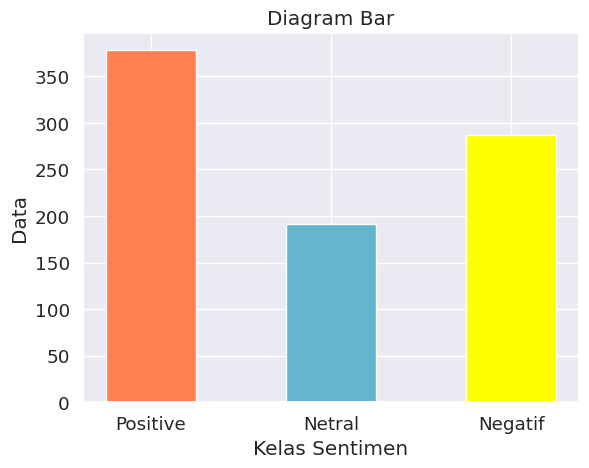

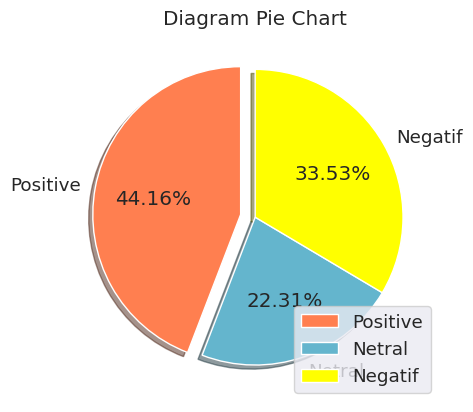

In [19]:

labels = ['Positive','Netral','Negatif']
Category2 = [378,191,287]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

## Split Dataset

In [17]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.2, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutanny

In [21]:
# Membuat data frame dari hasil split
df_train80 = pd.DataFrame()
df_train80['Steming'] = train_X
df_train80['Label'] = train_Y

df_test20 = pd.DataFrame()
df_test20['Steming'] = test_X
df_test20['Label'] = test_Y

In [8]:
#Data frame train hasil pembagian
df_train80

,Steming,Label
276,nikuba hoakmana ferraripakenikuba emang orang ...,netral
298,curiga orang bn dtang kesana jngn udang balik ...,negatif
480,brin hmmm enak loe kenal kenal nikuba,positif
551,perintah terima hasil karya anak bangsa perint...,negatif
190,apa ajar kompensasi hak paten apa hak paten ua...,netral
...,...,...
70,takut disaingin produk perintah nikuba takut r...,positif
277,bukti jual manfaat laku omong doang nikuba kha...,positif
9,ko bajing brin cuek sm temu nikuba ngapain iku...,negatif
359,nikuba stadion jis karya anak bangsa kelompok ...,negatif


In [9]:
#Data Frame test Hasil Pembagian
df_test20

,Steming,Label
85,kendara listrik temu nikuba indonesia misel ra...,positif
132,nikuba joko energi,positif
96,knapa brin jawabanya nikuba kembngkan indonesi...,negatif
107,nikuba tipu itali tertawa joko suprapto tipu p...,negatif
140,orang sains dah jelasin tipu ama nikuba bahan ...,negatif
...,...,...
202,bukti cari untung teknologi anak bangsa harga ...,positif
188,kendara listrik baterai nikelgmna nikuba gatot,negatif
76,takut bangkrut teknologi nikuba,negatif
208,moga misel lindung tuhan temu nikuba apresisia...,netral


In [10]:
df_test20.to_csv('/content/drive/My Drive/Colab-Notebooks/Analisis-Sentimen-Twitter-Terhadap-Pembatalan-Piala-Dunia-U-20-di-Indonesia-Tahun-2023-main/nikuba2-Test20.csv')

In [11]:
df_train80.to_csv('/content/drive/My Drive/Colab-Notebooks/Analisis-Sentimen-Twitter-Terhadap-Pembatalan-Piala-Dunia-U-20-di-Indonesia-Tahun-2023-main/nikuba2-Train80.csv')

## Pembobotan TF-IDF

In [12]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_8020 = TfidfVectorizer()
tfidf_vect_8020.fit(df['Steming'])
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['Steming'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['Steming'])

In [13]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_8020)


  (0, 2465)	0.4603859680817768
  (0, 1681)	0.19212852444683337
  (0, 1591)	0.07842286635743359
  (0, 810)	0.4603859680817768
  (0, 656)	0.4603859680817768
  (0, 613)	0.3303263926781924
  (0, 314)	0.4603859680817768
  (1, 2381)	0.3195892691073647
  (1, 2124)	0.3000321004401897
  (1, 1824)	0.3195892691073647
  (1, 1681)	0.13337116888786943
  (1, 1591)	0.05443933629190206
  (1, 1067)	0.2753929818484087
  (1, 954)	0.2861560684439642
  (1, 569)	0.3000321004401897
  (1, 453)	0.2861560684439642
  (1, 306)	0.3195892691073647
  (1, 172)	0.3195892691073647
  (1, 170)	0.3000321004401897
  (1, 129)	0.24704173110961422
  (2, 1591)	0.07344342602859666
  (2, 1269)	0.43115387592834165
  (2, 1048)	0.699268751879812
  (2, 805)	0.4047695448881024
  (2, 617)	0.349634375939906
  :	:
  (442, 2420)	0.22789693833532654
  (442, 2260)	0.10369842087312135
  (442, 2236)	0.19638086590824844
  (442, 2037)	0.21395085411852688
  (442, 1959)	0.22789693833532654
  (442, 1892)	0.21395085411852688
  (442, 1860)	0.2040559

In [14]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_8020)

  (0, 2274)	0.16092669358054182
  (0, 1909)	0.7944683056723956
  (0, 1785)	0.19639921847719063
  (0, 1591)	0.06766548730900508
  (0, 1533)	0.1867084245368945
  (0, 1441)	0.2348799271002192
  (0, 1257)	0.210571303256
  (0, 1050)	0.2390162183059756
  (0, 843)	0.32904983979357494
  (1, 1591)	0.19004497805652834
  (1, 956)	0.7456966092251304
  (1, 619)	0.638607448520323
  (2, 2402)	0.14290992634653063
  (2, 2042)	0.1576839208274116
  (2, 1972)	0.13589567924199042
  (2, 1797)	0.20827465110279422
  (2, 1785)	0.10297447591840317
  (2, 1701)	0.10467401349415664
  (2, 1681)	0.17383458302513283
  (2, 1591)	0.10643349012436197
  (2, 1436)	0.2422433695222189
  (2, 1313)	0.20827465110279422
  (2, 1162)	0.20827465110279422
  (2, 1151)	0.32939633586390366
  (2, 1101)	0.19552934681866954
  :	:
  (109, 1457)	0.1231055092448667
  (109, 1441)	0.13818166611544455
  (109, 1436)	0.13590536130097883
  (109, 1410)	0.23369590477368524
  (109, 1262)	0.23369590477368524
  (109, 1257)	0.12388071590127575
  (109, 

In [15]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

(443, 2478)
(111, 2478)


In [16]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_8020.vocabulary_)

{'anggar': 90, 'rp': 1967, 'triliun': 2347, 'nikuba': 1591, 'karya': 1004, 'anak': 76, 'bangsa': 180, 'insyaa': 873, 'allah': 59, 'laquwwata': 1216, 'illa': 830, 'billah': 288, 'tolong': 2333, 'perintah': 1785, 'perhatianya': 1783, 'nikubakayanya': 1601, 'bp': 329, 'aryanto': 125, 'mizel': 1447, 'serius': 2097, 'nikubadi': 1598, 'pakai': 1701, 'indonesia': 843, 'bisnis': 295, 'bbm': 219, 'alat': 51, 'kembang': 1040, 'pertamina': 1793, 'omset': 1670, 'anjlok': 99, 'coba': 424, 'mobil': 1457, 'putih': 1892, 'muat': 1486, 'toa': 2329, 'milik': 1425, 'kadrun': 974, 'ganti': 687, 'teriak': 2288, 'ditelity': 540, 'hoaxyg': 813, 'percaya': 1781, 'hoax': 811, 'silah': 2117, 'gantiin': 688, 'bensin': 246, 'media': 1362, 'kocak': 1107, 'ginian': 724, 'angkat': 94, 'polemik': 1828, 'masyarakat': 1351, 'gmpang': 728, 'bodoh': 315, 'temu': 2274, 'koar': 1106, 'medsos': 1364, 'alangkah': 49, 'baik': 163, 'paten': 1735, 'pack': 1695, 'jual': 960, 'dah': 457, 'ko': 1105, 'bajing': 166, 'brin': 334, 'c

## Penerapan Model SVM

In [22]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_8020,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

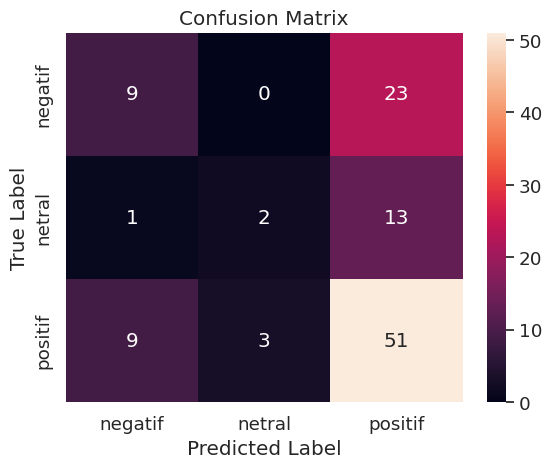

In [23]:
# Proses Pengujian
predictions_SVM_8020 = clf.predict(test_X_tfidf_8020)

#simpan data frame
test_prediction_8020 = pd.DataFrame()
test_prediction_8020['Text'] = test_X
test_prediction_8020['Label'] = predictions_SVM_8020

test_prediction_8020.to_csv('/content/drive/My Drive/Colab-Notebooks/Analisis-Sentimen-Twitter-Terhadap-Pembatalan-Piala-Dunia-U-20-di-Indonesia-Tahun-2023-main/test_prediction_8020.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_8020), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_8020))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_8020))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_8020, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_8020, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_8020, average='macro'))



              precision    recall  f1-score   support

     negatif       0.47      0.28      0.35        32
      netral       0.40      0.12      0.19        16
     positif       0.59      0.81      0.68        63

    accuracy                           0.56       111
   macro avg       0.49      0.41      0.41       111
weighted avg       0.53      0.56      0.52       111

Accuracy of the model :  0.5585585585585585
Precision of the model:  0.48663036902601337
Recall of the model:  0.4052579365079365
F1-score of the model:  0.40780578898225955


# Pemodelan Naive Bayes

In [25]:
#coba
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_8020,train_Y)
predictions= clf.predict(test_X_tfidf_8020)

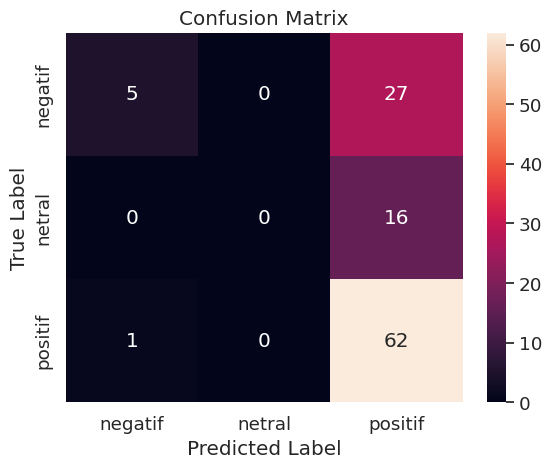

In [26]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [27]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions))


              precision    recall  f1-score   support

     negatif       0.83      0.16      0.26        32
      netral       0.00      0.00      0.00        16
     positif       0.59      0.98      0.74        63

    accuracy                           0.60       111
   macro avg       0.47      0.38      0.33       111
weighted avg       0.58      0.60      0.49       111



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pemodelan RandomForest

In [28]:
#coba
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X_tfidf_8020,train_Y)
predictionsRF= rf.predict(test_X_tfidf_8020)

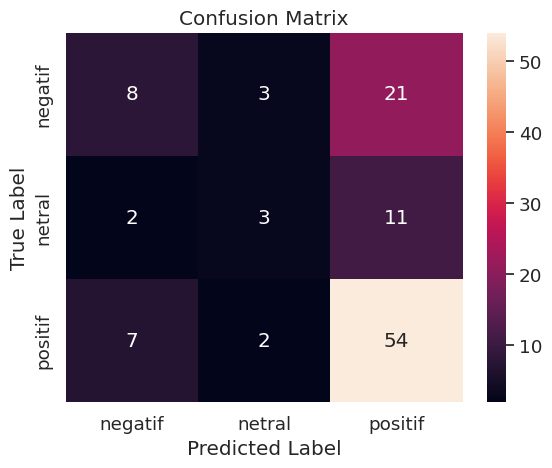

              precision    recall  f1-score   support

     negatif       0.47      0.25      0.33        32
      netral       0.38      0.19      0.25        16
     positif       0.63      0.86      0.72        63

    accuracy                           0.59       111
   macro avg       0.49      0.43      0.43       111
weighted avg       0.55      0.59      0.54       111



In [29]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictionsRF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print (classification_report(test_Y, predictionsRF))

## KNN clasifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kn = RandomForestClassifier()
kn.fit(train_X_tfidf_8020,train_Y)
predictionsKN= kn.predict(test_X_tfidf_8020)

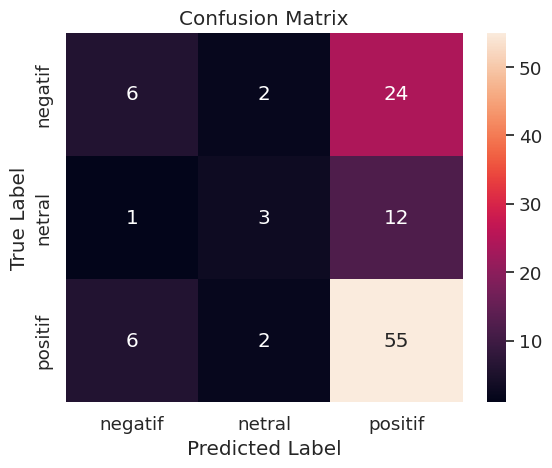

              precision    recall  f1-score   support

     negatif       0.46      0.19      0.27        32
      netral       0.43      0.19      0.26        16
     positif       0.60      0.87      0.71        63

    accuracy                           0.58       111
   macro avg       0.50      0.42      0.41       111
weighted avg       0.54      0.58      0.52       111



In [31]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictionsKN), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print (classification_report(test_Y, predictionsKN))